In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import warnings

In [67]:
# read csv/create dataframe
amzn_df = pd.read_csv("csv files/Nikola/Nikola.csv")
amzn_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2018-06-12,9.56,9.56,9.56,9.56,300000
1,2018-06-13,9.57,9.58,9.56,9.57,179100
2,2018-06-14,9.57,9.57,9.57,9.57,0
3,2018-06-15,9.57,9.57,9.57,9.57,0
4,2018-06-18,9.54,9.58,9.54,9.58,300
5,2018-06-19,9.57,9.57,9.57,9.57,300500
6,2018-06-20,9.54,9.59,9.54,9.59,900
7,2018-06-21,9.59,9.59,9.59,9.59,0
8,2018-06-22,9.58,9.58,9.58,9.58,100
9,2018-06-25,9.58,9.58,9.58,9.58,0


In [68]:
# make copy for visualizations
viz = amzn_df.copy()

In [69]:
# list columns
amzn_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [70]:
# check for missing values
missing_values = amzn_df.isnull().sum()
missing_values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [71]:
# dataframe info
amzn_info = amzn_df.info()
amzn_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1326 non-null   object 
 1   Open    1326 non-null   float64
 2   High    1326 non-null   float64
 3   Low     1326 non-null   float64
 4   Close   1326 non-null   float64
 5   Volume  1326 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 62.3+ KB


In [72]:
# display stats for each column
summary_stats = amzn_df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Open,1326.0,1.185430e+01,1.090421e+01,0.557,6.79750,10.04,1.189750e+01,9.313000e+01
High,1326.0,1.224953e+01,1.152684e+01,0.570,7.20625,10.06,1.220000e+01,9.399000e+01
Low,1326.0,1.140478e+01,1.005245e+01,0.521,6.56750,9.99,1.133500e+01,7.020000e+01
Close,1326.0,1.180899e+01,1.079034e+01,0.542,6.79250,10.03,1.176750e+01,7.973000e+01
Volume,1326.0,1.482669e+07,2.949874e+07,0.000,60475.00000,8754650.00,1.531118e+07,3.856128e+08


In [73]:
# convert date to datetime
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

<Axes: >

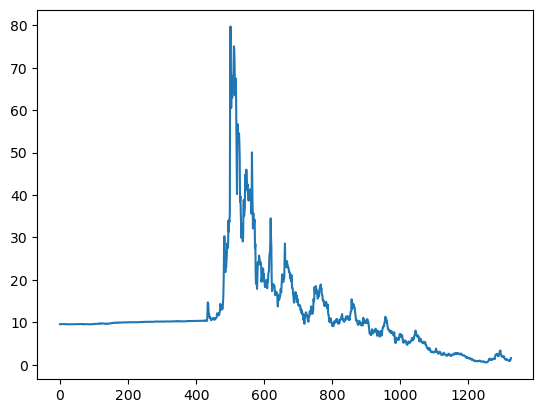

In [74]:
# plot closing
amzn_df['Close'].plot()

In [75]:
from sklearn.model_selection import train_test_split

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

#split data
train_data, test_data = train_test_split(amzn_df, test_size=0.05, shuffle=False)


In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [77]:
arima_model =ARIMA(train_data[target], order=(1, 1, 2))
arima_fit = arima_model.fit()

In [78]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(mse)

1.24450728536255


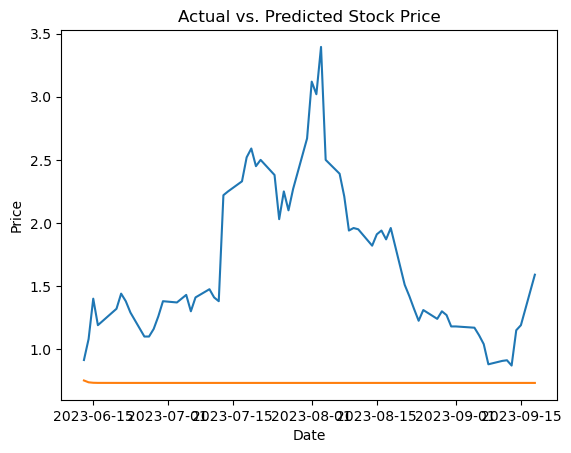

In [79]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()

In [80]:
#pip install xgboost

In [81]:
import xgboost as xgb

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

train_dmatrix = xgb.DMatrix(data=train_data[features], label=train_data[target])

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix)

In [82]:
# Create DMatrix for test data
test_dmatrix = xgb.DMatrix(data=test_data[features], label=test_data[target])

# Use the trained XGBoost model to make predictions
xgb_predictions = xgb_model.predict(test_dmatrix)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(test_data[target], xgb_predictions)

In [83]:
xgb_predictions

array([5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 6.01345  , 6.01345  , 6.2603416,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 , 5.813851 ,
       5.813851 ], dtype=float32)

In [84]:
#test_data = test_dmatrix.get_data()
#print(test_data)

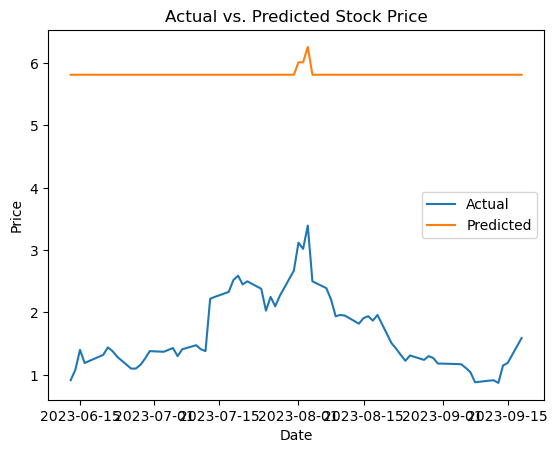

In [85]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], xgb_predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()
